# I. DATA

## 1. Download and examine our data

Download data from here: https://drive.google.com/open?id=1MWIHR2zC9ty2B3O2aIEfMHJ3HNbeBkVV, then unzip to `data/`.

Let's see what's in our data folder.

In [1]:
# Use the "!ls" command to list your directory contents. 
# The preceding exclamation mark tells Jupyter to run a bash command instead of Python
!ls data/train/chihuahua

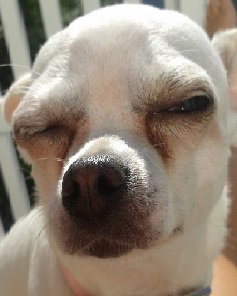

In [2]:
# import the Image class from PIL, the Python Image Library
from PIL import Image

# open an image file of choice
x = Image.open("data/train/chihuahua/10.jpg")
x

## 2. Instantiate Dataset object

**Purpose:** index and load the image files we want to use for our dataset, assign numeric labels to each class.

We can either define a custom _Dataset_ class, or import a prebuilt _Dataset_ from the `torchvision` package. Because this is our first tutorial, let's use a prebuilt one.

According to the <a href="https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder">docs</a>, an ImageFolder Dataset helps load data arranged like this:
```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

Here is the class signature. We at least need a **root directory**, but we should also pass in a **transform**.

`torchvision.datasets.ImageFolder(root, transform=None, target_transform=None, loader=<function default_loader>, is_valid_file=None)`

In [3]:
# import ImageFolder from torchvision.datasets
from torchvision.datasets import ImageFolder

Our transform will do the following:
<img src="media/transform.jpg" width=600/>

In [4]:
# import transforms from torchvision
from torchvision import transforms
# Declare transforms to (1) resize images (2) turn PIL Images into PyTorch Tensors
my_transforms = transforms.Compose(
    [transforms.Resize((224,224)), transforms.ToTensor()]
)
my_transforms

Compose(
    Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
    ToTensor()
)

In [5]:
# instantiate an ImageFolder object
my_dataset = ImageFolder("data/train", my_transforms)
my_dataset

Dataset ImageFolder
    Number of datapoints: 120
    Root Location: data/train
    Transforms (if any): Compose(
                             Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                         )
    Target Transforms (if any): None

In [6]:
# The Dataset object is indexable, just like an array. Try accessing the 0th index, what gets returned?
my_dataset[2]

(tensor([[[0.5255, 0.5176, 0.5333,  ..., 0.6235, 0.6275, 0.6275],
          [0.5608, 0.5451, 0.5490,  ..., 0.6235, 0.6275, 0.6314],
          [0.5804, 0.5647, 0.5686,  ..., 0.5961, 0.6000, 0.6078],
          ...,
          [0.9020, 0.8745, 0.8157,  ..., 1.0000, 1.0000, 1.0000],
          [0.8784, 0.8275, 0.7804,  ..., 1.0000, 1.0000, 1.0000],
          [0.8510, 0.8078, 0.7686,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.3176, 0.3059, 0.3176,  ..., 0.4314, 0.4353, 0.4353],
          [0.3451, 0.3294, 0.3333,  ..., 0.4235, 0.4275, 0.4314],
          [0.3647, 0.3490, 0.3451,  ..., 0.3922, 0.3961, 0.4039],
          ...,
          [0.7294, 0.7020, 0.6392,  ..., 1.0000, 1.0000, 1.0000],
          [0.7059, 0.6549, 0.6039,  ..., 1.0000, 1.0000, 1.0000],
          [0.6745, 0.6353, 0.5882,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.0510, 0.0431, 0.0588,  ..., 0.2706, 0.2745, 0.2745],
          [0.0824, 0.0745, 0.0784,  ..., 0.2549, 0.2588, 0.2627],
          [0.1098, 0.0941, 0.0941,  ...,

**Problem:** this basic iterator only loads one image at a time. But the power of a GPU comes from running multiple calculations in _parallel_. How can we load whole batches of images at once?

## 3. Declare DataLoader and data transforms

**Purpose:** load data in the desired batch size, with shuffling, using multiple CPU threads for efficiency.

In [7]:
# import the DataLoader class from torch.utils.data
from torch.utils.data import DataLoader

# instantiate a DataLoader object, pass in our instantiated Dataset object
my_dataloader = DataLoader(my_dataset, batch_size=16, num_workers=4, shuffle=True)
my_dataloader.__dict__

{'dataset': Dataset ImageFolder
     Number of datapoints: 120
     Root Location: data/train
     Transforms (if any): Compose(
                              Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
                              ToTensor()
                          )
     Target Transforms (if any): None,
 'batch_size': 16,
 'num_workers': 4,
 'collate_fn': <function torch.utils.data._utils.collate.default_collate(batch)>,
 'pin_memory': False,
 'drop_last': False,
 'timeout': 0,
 'worker_init_fn': None,
 'sampler': <torch.utils.data.sampler.RandomSampler at 0x7fa576e0f8d0>,
 'batch_sampler': <torch.utils.data.sampler.BatchSampler at 0x7fa576e2f278>,
 '_DataLoader__initialized': True}

In [8]:
# what's in our dataloader?
for data in my_dataloader:
    break
# check the shape of our data! notice how it prepends an extra batch dimension
tensors, labels = data
tensors.shape, labels.shape

(torch.Size([16, 3, 224, 224]), torch.Size([16]))

# II. MODEL (Neural Network)

**Purpose:** define our neural network architecture.

We can either define a custom architecture that extends _nn.Module_, or import a predefined architecture from `torchvision`. Because this is our first tutorial, let's again use torchvision.

Here's a list of officially available models: https://pytorch.org/docs/stable/torchvision/models.html

(Even more unofficial implementations are available <a href="https://github.com/Cadene/pretrained-models.pytorch">here</a>)

In [9]:
# import torchvision.models
import torchvision.models as models
# fetch an instance of AlexNet
my_net = models.alexnet()
# examine the model parameters
my_net.parameters

<bound method Module.parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2

Diagram of AlexNet:
<img src="media/alexnet.png" width=500/>

The output layer represents the number of classes. The index with the highest activation is the predicted class.

In [10]:
# quick check, pass an image through our network
imgs, _ = next(iter(my_dataloader)) # fetch image
output = my_net(imgs) # forward pass
# what's the shape?
output.shape

torch.Size([16, 1000])

The output of this default architecture is for 1000 classes, not 2 classes for our problem. Let's add a final layer at the end. Notice how the architecture parameters ends with "classifier?" We'll modify that.

In [11]:
# import torch.nn
import torch.nn as nn
# overwrite the "classifier" to add a Linear 1000->2 layer at the end
my_net.classifier = nn.Sequential(my_net.classifier, nn.Linear(in_features=1000, out_features=2))
my_net.parameters

<bound method Module.parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Sequential(
      (0): Dropout(p=0.5)
      (1): Linear(in_features=9216, out_feature

In [12]:
# quick test, pass an image through our network. output should now be size 2
imgs, labels = next(iter(my_dataloader))
my_net(imgs).shape

torch.Size([16, 2])

# III. LOSS 
(a.k.a. cost or error function)

**Purpose:** calculate how wrong the neural network's predictions are.

Why do we need to choose a loss? Because there are multiple ways to define what error means, e.g. L1 error, L2 error. Let's use [CrossEntropyLoss](https://pytorch.org/docs/stable/nn.html#crossentropyloss).

In [13]:
# instantiate CrossEntropyLoss object
criterion = nn.CrossEntropyLoss()

In [14]:
# run a quick test
criterion(my_net(imgs), labels)

tensor(0.6875, grad_fn=<NllLossBackward>)

# IV. OPTIMIZER

**Purpose:** decide how the model should respond to error.

See official available optimizers [here](https://pytorch.org/docs/stable/optim.html).

Examples of different optimization strategies on varying error surfaces.

<table>
<tr>
    <td> <img src="media/optimizer_1.gif" height="275" /> </td>
    <td> <img src="media/optimizer_2.gif" height="275" /> </td>
    <td> <img src="media/optimizer_3.gif" height="275" /> </td>
</tr>
</table>

In [15]:
# import torch.optim
import torch.optim as optim
# instantiate an optimizer
optimizer = optim.SGD(my_net.parameters(), lr=0.001)

# V. TRAIN LOOP

In [16]:
# create a device object for GPU usage
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
my_net = my_net.to(device)

In [17]:
from tqdm import tqdm_notebook as tqdm

# train for n epochs. an epoch is a full iteration through our dataset
num_epochs = 20

# create something to track of accuracy over time
accuracies = []

# loop over epochs
for epoch in tqdm(range(num_epochs), desc="Epoch"):
    
    # track our accuracy
    correct_this_epoch = 0.
    
    # loop over our data loader
    for data, labels in tqdm(my_dataloader, desc="Batch", leave=False):
        data, labels = data.to(device), labels.to(device)
        
        # pass data through model
        outputs = my_net(data)
        # calculate the loss
        loss = criterion(outputs, labels)
        
        # Use our optimizer to update the network
        # 1: zero_grad our optimizer
        optimizer.zero_grad()
        # 2: run a backward pass
        loss.backward()
        # 3: make a step
        optimizer.step()
        
        _, preds = torch.max(outputs, dim=1)
        correct_this_epoch += torch.sum(preds==labels.data)
        
    accuracy_this_epoch = correct_this_epoch.double() / len(my_dataset)
    print(accuracy_this_epoch)
    accuracies.append(accuracy_this_epoch.item())

tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)


tensor(0.5417, dtype=torch.float64)



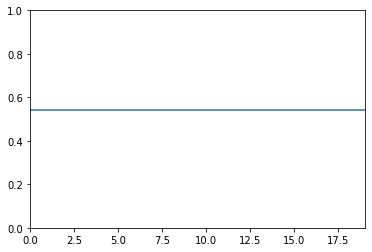

In [21]:
# make a simple line plot using pandas, ylim between 0 and 1
import pandas as pd
pd.Series(accuracies).plot.line(ylim=(0,1))

# VI. VISUALIZE RESULTS

**Consider:** How accurate was your model? How confident were its predictions? Does it make clear-cut decisions?

Feel free to use the below function to visualize results. I won't go through it because its details is not part of this tutorial.

In [19]:
import matplotlib.pyplot as plt  # graphical library, to plot images
# special Jupyter notebook command to show plots inline instead of in a new window
%matplotlib inline

import os
from glob import glob
from math import floor

def visualize_results(data_root, model, transforms):
    set_eval = False
    if model.training:
        set_eval=True
        model.eval()
    
    val_dataset = ImageFolder(data_root, transforms)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=len(val_dataset))
    data, labels = next(iter(val_loader))
    data, labels = data.to(device), labels.to(device)
    outputs = model(data)
    _, preds = torch.max(outputs, dim=1)
    num_correct = torch.sum(preds==labels.data).item()
    pred_probs = torch.nn.functional.softmax(outputs, dim=-1).cpu().data.numpy()
    

    print("VALIDATION ACCURACY:", num_correct / len(val_dataset))

    # show the probabilities for each picture
    fig, axs = plt.subplots(6, 5, figsize=(20, 20))
    images = [Image.open(img_path) for img_path in list(zip(*val_dataset.samples))[0]]
    for i, img in enumerate(images):
        ax = axs[floor(i/5)][i % 5]
        ax.axis('off')
        ax.set_title("{:.0f}% Chi, {:.0f}% Muff".format(100*pred_probs[i,0], 100*pred_probs[i,1]), fontsize=18)
        ax.imshow(img)
    
    if set_eval:
        model.train()

VALIDATION ACCURACY: 0.5666666666666667


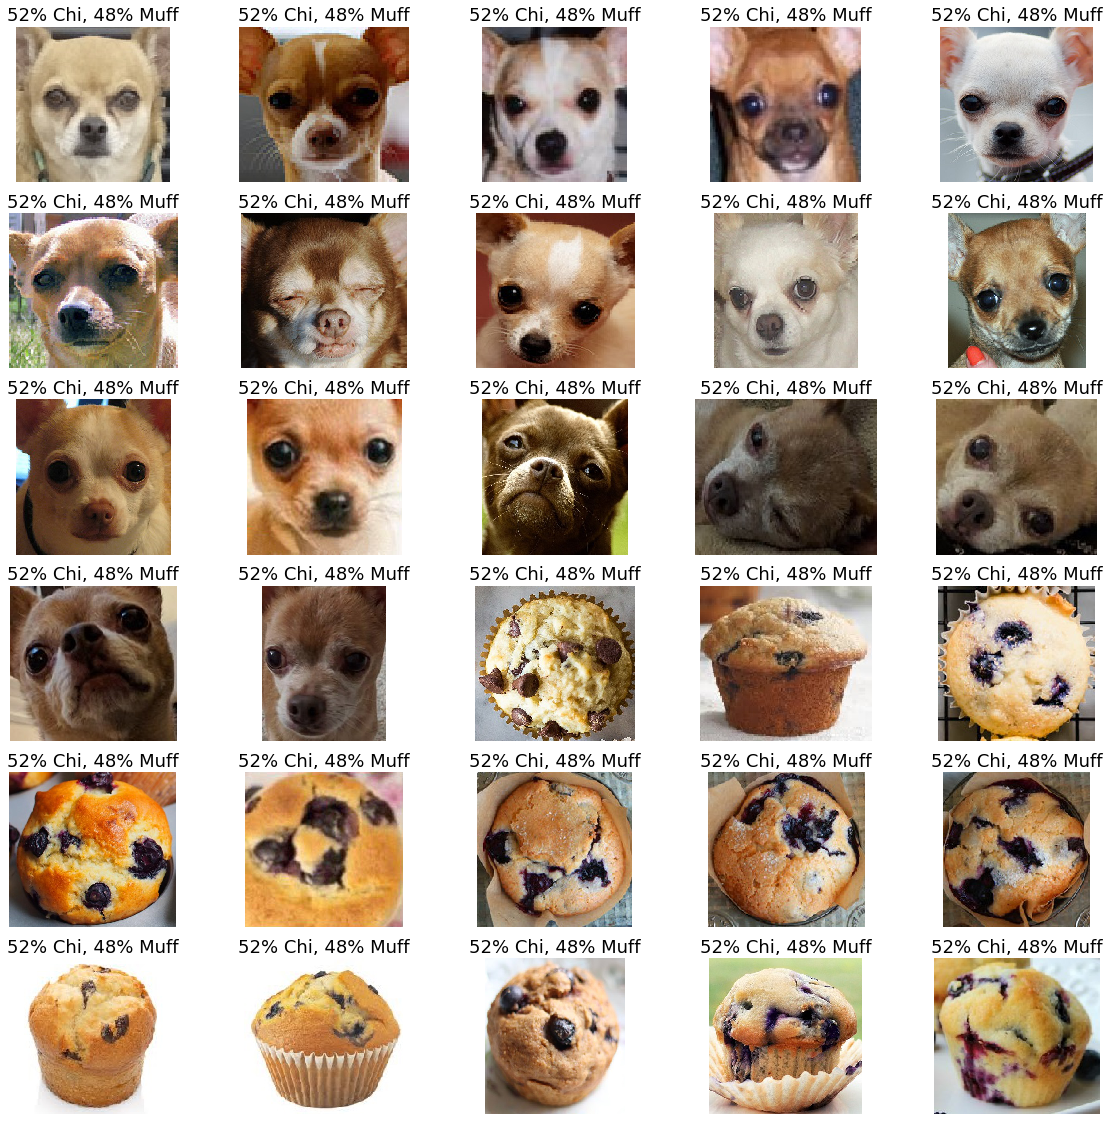

In [20]:
visualize_results("data/validation", my_net, my_transforms)

## Congratulations! You've successfully trained a neural network!

# Can You Do Better?

Now that we've shown you how to train a neural network, can you improve the validation accuracy by tweaking the parameters? **We challenge you to reach 100% accuracy!** (hint, it's not too hard).

Some parameters to play with:
- Number of epochs
- The model type
- The learning rate "lr" parameter in the optimizer
- The type of optimizer (https://pytorch.org/docs/stable/optim.html)
- Number of layers and layer dimensions
- Image size
- Data augmentation transforms (https://pytorch.org/docs/stable/torchvision/transforms.html)